In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [2]:
# import some data to play with
check = pd.read_csv(r"C:\Users\ADITYA\Desktop\EXCELR ASSIGNMENT\DECISION TREE\Fraud_check.csv")

In [3]:
check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
check.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
# Renamning the data
check_1 = check.rename({'Marital.Status':'Maritial_status','Taxable.Income':'Tax','City.Population':'City_population','Work.Experience':'Work_experience'},axis = 1)
check_1

,Undergrad,Maritial_status,Tax,City_population,Work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [7]:
check_1.columns


Index(['Undergrad', 'Maritial_status', 'Tax', 'City_population',
       'Work_experience', 'Urban'],
      dtype='object')

In [8]:
check_1.Undergrad.value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [9]:
check_1.Urban.value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [10]:
check_1.Maritial_status.value_counts()

Single      217
Married     194
Divorced    189
Name: Maritial_status, dtype: int64

In [11]:
label_encoder = preprocessing.LabelEncoder()
check_1['Undergrad']= label_encoder.fit_transform(check_1['Undergrad']) 

In [12]:
check_1['Undergrad'].value_counts()

1    312
0    288
Name: Undergrad, dtype: int64

In [13]:
label_encoder = preprocessing.LabelEncoder()
check_1['Urban']= label_encoder.fit_transform(check_1['Urban']) 

In [14]:
check_1['Urban'].value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [15]:
label_encoder = preprocessing.LabelEncoder()
check_1['Maritial_status']= label_encoder.fit_transform(check_1['Maritial_status']) 

In [16]:
check_1['Maritial_status'].value_counts()

2    217
1    194
0    189
Name: Maritial_status, dtype: int64

In [17]:
# printing all columns of the dataframe\
check_1.columns


Index(['Undergrad', 'Maritial_status', 'Tax', 'City_population',
       'Work_experience', 'Urban'],
      dtype='object')

In [18]:
check_1["taxable_income"]="GOOD"
check_1.loc[check_1["Tax"]<=30000,"taxable_income"]="Risky"
check_1.drop(['Tax'],axis = 1,inplace = True)


In [19]:
check_1['taxable_income'].value_counts()

GOOD     476
Risky    124
Name: taxable_income, dtype: int64

In [22]:
check_1.head()

,Undergrad,Maritial_status,City_population,Work_experience,Urban,taxable_income
0,0,2,50047,10,1,GOOD
1,1,0,134075,18,1,GOOD
2,0,1,160205,30,1,GOOD
3,1,2,193264,15,1,GOOD
4,0,1,27533,28,0,GOOD


In [25]:
x=check_1.iloc[:,0:5]
y=check_1['taxable_income']

In [26]:
x

,Undergrad,Maritial_status,City_population,Work_experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [27]:
y 

0      GOOD
1      GOOD
2      GOOD
3      GOOD
4      GOOD
       ... 
595    GOOD
596    GOOD
597    GOOD
598    GOOD
599    GOOD
Name: taxable_income, Length: 600, dtype: object

In [29]:
check_1['taxable_income'].unique()

array(['GOOD', 'Risky'], dtype=object)

In [30]:
check_1.taxable_income.value_counts()

GOOD     476
Risky    124
Name: taxable_income, dtype: int64

In [32]:
colnames = list(check_1.columns)
colnames

['Undergrad',
 'Maritial_status',
 'City_population',
 'Work_experience',
 'Urban',
 'taxable_income']

In [33]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [34]:
x_train

,Undergrad,Maritial_status,City_population,Work_experience,Urban
332,1,0,84132,1,0
13,0,1,86649,16,1
274,1,1,112584,25,0
257,1,1,31611,17,1
112,1,2,193038,26,1
...,...,...,...,...,...
440,0,2,170407,13,1
165,1,1,38463,23,1
7,1,2,131253,3,1
219,1,0,26814,9,0


In [35]:
y_train

332     GOOD
13      GOOD
274     GOOD
257     GOOD
112     GOOD
       ...  
440     GOOD
165     GOOD
7       GOOD
219    Risky
326    Risky
Name: taxable_income, Length: 480, dtype: object

### Building Decision Tree Classifier using Entropy Criteria

In [122]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=7)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

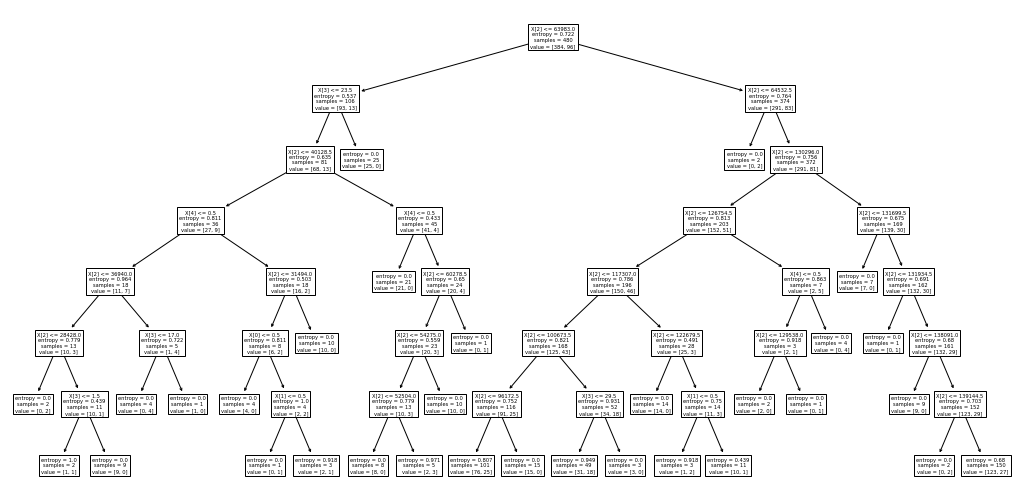

In [123]:
#PLot the decision tree
fig = plt.figure(figsize=(18,9))
tree.plot_tree(model);


In [124]:
y_train.value_counts()

GOOD     384
Risky     96
Name: taxable_income, dtype: int64

In [125]:
check_1.columns

Index(['Undergrad', 'Maritial_status', 'City_population', 'Work_experience',
       'Urban', 'taxable_income'],
      dtype='object')

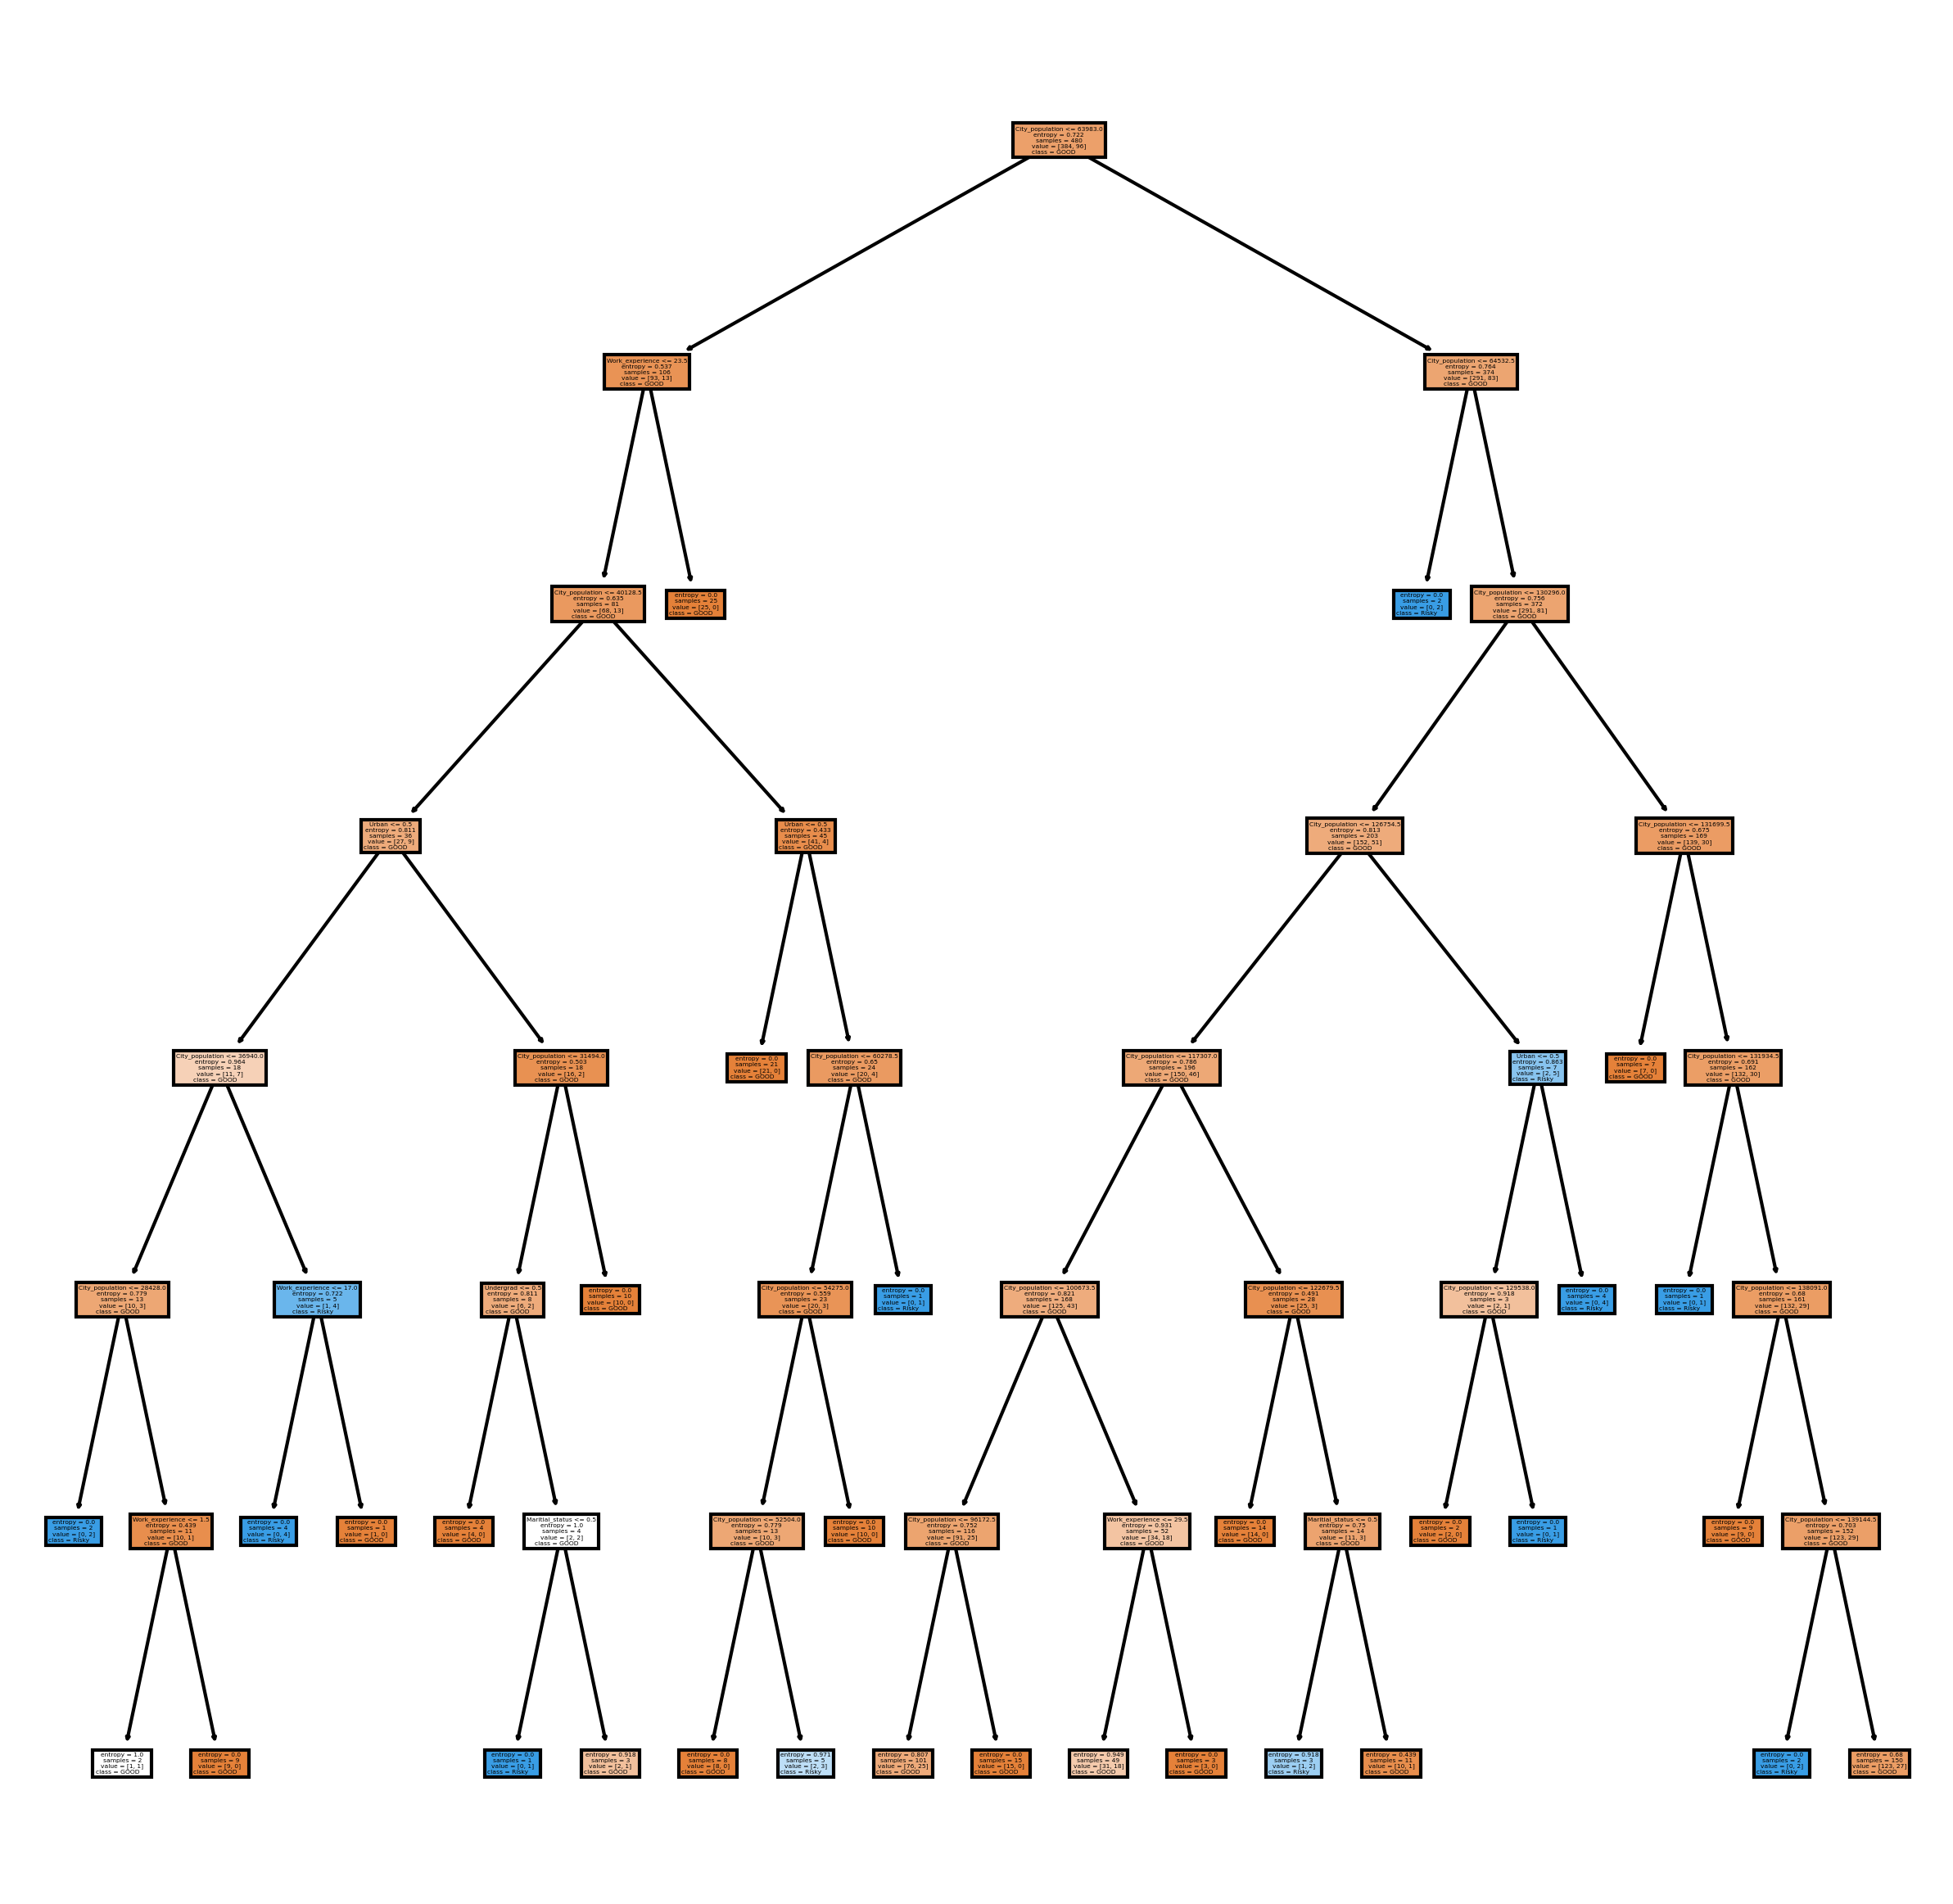

In [126]:
fn=['Undergrad', 'Maritial_status', 'City_population', 'Work_experience',
       'Urban']
cn=['GOOD     ','Risky     ']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [127]:
pred_train = model.predict(x_train)

In [128]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

GOOD     114
Risky      6
dtype: int64

In [129]:
y_test

159     GOOD
307     GOOD
253     GOOD
528     GOOD
137    Risky
       ...  
102     GOOD
577     GOOD
18      GOOD
560     GOOD
62      GOOD
Name: taxable_income, Length: 120, dtype: object

In [130]:
preds

array(['GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'Risky',
       'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD',
       'GOOD', 'GOOD', 'GOOD', 'Risky', 'GOOD', 'GOOD', 'GOOD', 'GOOD',
       'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD',
       'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD',
       'Risky', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD',
       'GOOD', 'GOOD', 'Risky', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD',
       'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD',
       'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD',
       'GOOD', 'Risky', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD',
       'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD',
       'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD',
       'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD',
       'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'GOOD',
 

In [131]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,GOOD,Risky
taxable_income,,
GOOD,88,4
Risky,26,2


In [132]:
df_t = pd.DataFrame({'Actual':y_test, 'Predicted':preds})
df_t

,Actual,Predicted
159,GOOD,GOOD
307,GOOD,GOOD
253,GOOD,GOOD
528,GOOD,GOOD
137,Risky,GOOD
...,...,...
102,GOOD,GOOD
577,GOOD,Risky
18,GOOD,GOOD
560,GOOD,GOOD


In [133]:
# Accuracy 
np.mean(preds==y_test)

0.75

In [134]:
y_test[127:]

Series([], Name: taxable_income, dtype: object)